<a href="https://colab.research.google.com/github/ShivaniMohite1/CodeClauseInternship_ProjectName/blob/main/CodeClause_DS_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeClause Data Science Internship**

**Allocated Project** :-

**Project 1 :- Fake News Detection**

In [ ]:
# libraries for data manipulation and exploration
import pandas as pd
import numpy as np

# for text processing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = '/content/data.csv'
df = pd.read_csv(data)


In [ ]:
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [ ]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
df.shape

(4009, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
df.dtypes

Headline    object
Body        object
Label        int64
Website     object
Text        object
dtype: object

In [ ]:
df["Label"].value_counts()

0    2120
1    1868
Name: Label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
name_var = df['Label'].value_counts().index
print(name_var)

Int64Index([0, 1], dtype='int64')


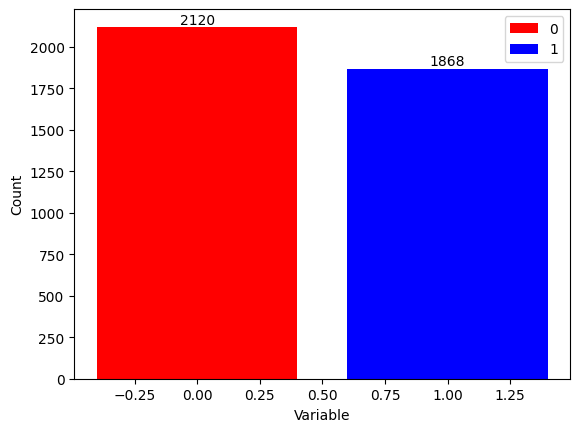

In [ ]:
count_var = df['Label'].value_counts()

plt.bar(name_var,count_var, label = name_var, color = ('red','blue'))

for i, value in enumerate(count_var):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Variable')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df.isnull().sum()

Headline    0
Body        0
Label       0
Website     2
Text        0
dtype: int64

In [ ]:
na_row = df.loc[df['Body'].isnull(), :]
na_row

,Headline,Body,Label,Website,Text


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Label'}, axis=1)
              .sort_values('Label', ascending=True))
  xs = counted['Label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('count()')

In [ ]:
X = df.drop('Label',axis=1)
X

,Headline,Body,Website,Text
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,www.bbc.com,Four ways Bob Corker skewered Donald Trump Ima...
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",www.reuters.com,Linklater's war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,www.nytimes.com,Trump’s Fight With Corker Jeopardizes His Legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,www.reuters.com,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",www.cnn.com,Jason Aldean opens 'SNL' with Vegas tribute Co...
...,...,...,...,...
4003,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",beforeitsnews.com,CNN and Globalist Exposed - Steve Quayle and A...
4004,Trends to Watch,Trends to Watch\n% of readers think this story...,beforeitsnews.com,Trends to Watch Trends to Watch\n% of readers ...
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,beforeitsnews.com,Trump Jr. Is Soon To Give A 30-Minute Speech F...
4007,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,www.reuters.com,China to accept overseas trial data in bid to ...


In [ ]:
Y = df['Label']
Y

0       1
1       1
2       1
3       1
4       1
       ..
4003    0
4004    0
4005    0
4007    1
4008    0
Name: Label, Length: 3988, dtype: int64

In [ ]:
df = df.dropna()
df.shape

(3986, 5)

In [ ]:
msg = df.copy()
msg.head(10)

,Headline,Body,Label,Website,Text
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,www.bbc.com,Four ways Bob Corker skewered Donald Trump Ima...
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,www.reuters.com,Linklater's war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,www.nytimes.com,Trump’s Fight With Corker Jeopardizes His Legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,www.reuters.com,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,www.cnn.com,Jason Aldean opens 'SNL' with Vegas tribute Co...
5,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,beforeitsnews.com,JetNation FanDuel League; Week 4 JetNation Fan...
6,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1,www.nytimes.com,Kansas Tried a Tax Plan Similar to Trump’s. It...
7,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1,www.reuters.com,"India RBI chief: growth important, but not at ..."
8,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1,www.reuters.com,EPA chief to sign rule on Clean Power Plan exi...
9,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1,www.reuters.com,Talks on sale of Air Berlin planes to easyJet ...


In [ ]:
msg.reset_index(inplace = True)
msg.head(10)

,index,Headline,Body,Label,Website,Text
0,0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,www.bbc.com,Four ways Bob Corker skewered Donald Trump Ima...
1,1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,www.reuters.com,Linklater's war veteran comedy speaks to moder...
2,2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,www.nytimes.com,Trump’s Fight With Corker Jeopardizes His Legi...
3,3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,www.reuters.com,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,www.cnn.com,Jason Aldean opens 'SNL' with Vegas tribute Co...
5,5,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,beforeitsnews.com,JetNation FanDuel League; Week 4 JetNation Fan...
6,6,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1,www.nytimes.com,Kansas Tried a Tax Plan Similar to Trump’s. It...
7,7,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1,www.reuters.com,"India RBI chief: growth important, but not at ..."
8,8,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1,www.reuters.com,EPA chief to sign rule on Clean Power Plan exi...
9,9,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1,www.reuters.com,Talks on sale of Air Berlin planes to easyJet ...


In [ ]:
msg['Body'][5]

"JetNation FanDuel League; Week 4\n% of readers think this story is Fact. Add your two cents.\n(Before It's News)\nOur FanDuel league is back again this week. Here are the details:\n$900 in total prize money. $250 to the winner. $10 to enter.\nRemember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.\nClick this link to enter — http://fanduel.com/JetNation\nYou can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.\nSource: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/"

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['Body'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

'mexico citi reuter egypt cheiron hold limit right partner mexican nation oil compani pemex onshor cardena mora project industri regul said wednesday tie mark second joint ventur pemex equiti partner sinc energi open final end compani decad long monopoli allow develop project privat foreign oil compani cardena mora squar mile sq km field locat tabasco state believ contain million barrel oil equival boe proven probabl possibl reserv'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_v = TfidfVectorizer(max_features = 5000,ngram_range=(1,3))
X = Tfid_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(3986, 5000)

In [ ]:
y = msg['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state=0)

In [ ]:
Tfid_v.get_feature_names_out()[:20]

array(['aaron', 'aaron judg', 'aaron kesel', 'aaron rodger', 'ab',
       'abandon', 'abc', 'abe', 'aberti', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'abus', 'ac', 'academ', 'academi',
       'acc'], dtype=object)

In [ ]:
count_df = pd.DataFrame(X_train,columns=Tfid_v.get_feature_names_out())

In [ ]:
count_df

,aaron,aaron judg,aaron kesel,aaron rodger,ab,abandon,abc,abe,aberti,abil,...,yorker,young,younger,youth,youtub,zach,zapatista,zealand,zero,zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074722,0.0,0.0
1,0.073732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2666,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2668,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Applying confusion matrix
def plot_confusion_matrix(cm, classes,normalize = False,cmap = plt.cm.Blues,title = 'Confusion matrice'):
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation =45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.axis(x=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j,i, cm[i,j], horizontalalignment ="center",color ="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn import metrics
import itertools

accuracy:   0.900
Confusion matrix, without normalization


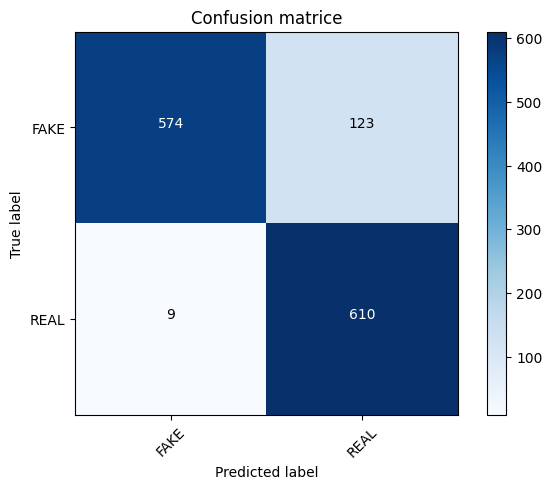

In [ ]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm.shape
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
cm.shape

(2, 2)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change =20)

In [ ]:
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy : %0.3f" %score)


accuracy : 0.985


Confusion matrix, without normalization


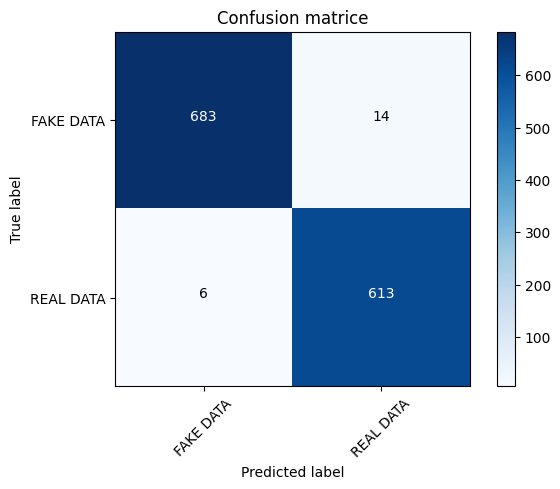

In [ ]:
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes = ['FAKE DATA','REAL DATA'])

In [ ]:
# dropping rows where there is any null value
df.dropna(inplace=True, axis=0)

# taking only the name of website from the URLs
pattern = 'https?://([\w.]+)/'
df['Website'] = df.URLs.str.extract(pattern)
df.drop('URLs', axis=1, inplace=True)

In [ ]:
fake_news_count = df[df.Label == 0]['Website'].value_counts()
real_news_count = df[df.Label == 1]['Website'].value_counts()

In [ ]:
fdf = pd.DataFrame({
    'Web':fake_news_count.index,
    'Fake':fake_news_count.values
})

rdf = pd.DataFrame({
    'Web':real_news_count.index,
    'Real':real_news_count.values
})

In [ ]:
rf_count = pd.merge(rdf, fdf, on='Web', how='outer').fillna(0)
rf_count['Real'] = rf_count['Real'].astype(int)
rf_count['Fake'] = rf_count['Fake'].astype(int)
rf_count

,Web,Real,Fake
0,www.reuters.com,646,0
1,www.cnn.com,389,0
2,www.nytimes.com,341,0
3,www.bbc.com,333,0
4,abcnews.go.com,57,0
5,money.cnn.com,49,0
6,edition.cnn.com,15,0
7,inhealth.cnn.com,14,0
8,www.bbc.co.uk,10,0
9,bleacherreport.com,8,0


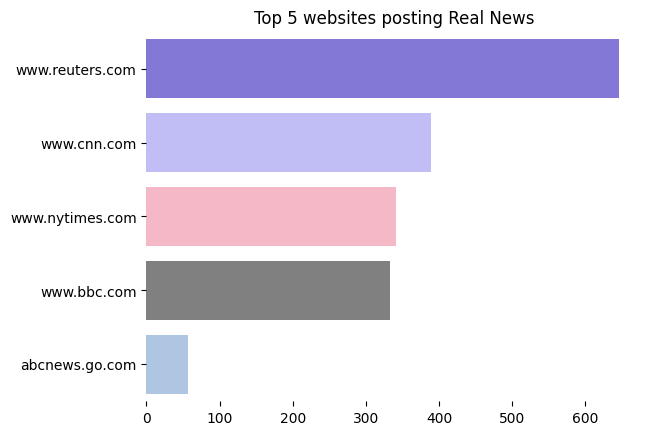

In [ ]:
sns.barplot(y=real_news_count[:5].index, x=real_news_count[:5].values,
            palette=['#7868e6', '#b8b5ff', '#ffaec0', 'grey', '#a7c5eb'])
sns.despine(bottom=True, left=True)
plt.title('Top 5 websites posting Real News');

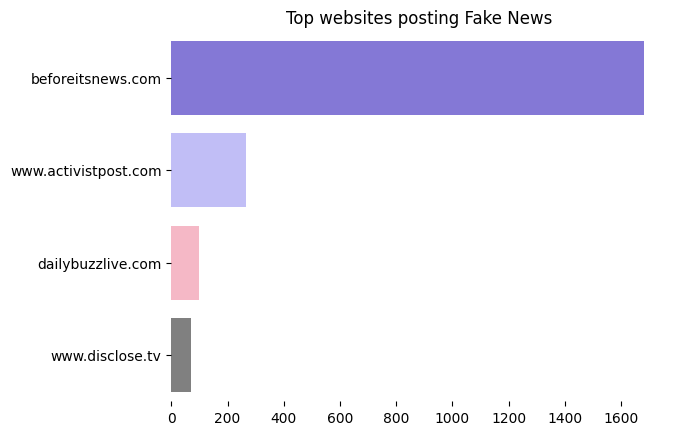

In [ ]:
sns.barplot(y=fake_news_count.index, x=fake_news_count.values,
            palette=['#7868e6', '#b8b5ff', '#ffaec0', 'grey'])
sns.despine(bottom=True, left=True)
plt.title('Top websites posting Fake News');